In [1]:
import numpy as np
import matplotlib.pyplot as plt

from jwst import datamodels
from stdatamodels.jwst.datamodels import dqflags

from helpers.miri_helpers import miri_detector1

In [2]:
import jwst
print(jwst.__version__)

1.16.1.dev129+g7317c9f0c


In [3]:
rawfile = "jw02729002001_02107_00001_mirimage_uncal.fits"

In [8]:
# run detector1 and save the linearized ramp
miri_detector1([f"data/{rawfile}"], "data", save_jump_info=True, bright_use_group1=True, no_grow_saturation=False)

2024-11-05 08:53:18,208 - stpipe - INFO - PARS-EMICORRSTEP parameters found: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_pars-emicorrstep_0002.asdf
2024-11-05 08:53:18,218 - stpipe - INFO - PARS-DARKCURRENTSTEP parameters found: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_pars-darkcurrentstep_0001.asdf
2024-11-05 08:53:18,226 - stpipe - INFO - PARS-JUMPSTEP parameters found: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_pars-jumpstep_0004.asdf
2024-11-05 08:53:18,233 - CRDS - ERROR -  Error determining best reference for 'pars-cleanflickernoisestep'  =   Unknown reference type 'pars-cleanflickernoisestep'
2024-11-05 08:53:18,235 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_pars-detector1pipeline_0008.asdf
2024-11-05 08:53:18,248 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2024-11-05 08:53:18,249 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleSte

data/jw02729002001_02107_00001_mirimage_uncal.fits


2024-11-05 08:53:18,435 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: data
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  save_calibrated_ramp: True
  steps:
    group_scale:
      pre_hooks: []
      post_hooks: []
      output_file: None
      output_dir: None
      output_ext: .fits
      output_use_model: False
      output_use_index: True
      save_results: False
      skip: False
      suffix: None
      search_output_file: True
      input_dir: ''
    dq_init:
      pre_hooks: []
      post_hooks: []
      output_file: None
      output_dir: None
      output_ext: .fits
      output_use_model: False
      output_use_index: True
      save_results: False
      skip: False
      suffix: None
      search_output_file: True
      input_dir: ''
    emicorr:
      pre_hook

In [9]:
obs = datamodels.open(f"data/{rawfile.replace('uncal', 'ramp')}")

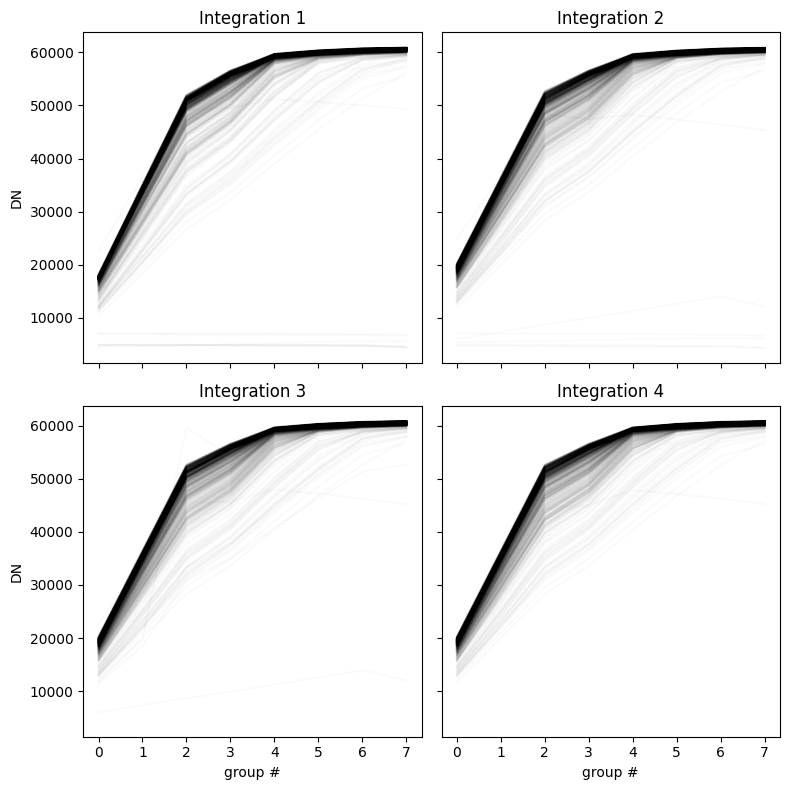

In [17]:
# plot ramps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.flatten()

groupnum = range(len(obs.data[0, :, 0, 0]))
for i in range(4):
    # find all the apprpriately flagged pixels
    svals = ((obs.groupdq[i, 2, :, :] & dqflags.group['SATURATED']) == 0) & ((obs.groupdq[i, 3, :, :] & dqflags.group['SATURATED']) > 0)
    diff1 = (obs.data[i, 1, :, :])[svals] - (obs.data[i, 0, :, :])[svals]
    diff2 = (obs.data[i, 2, :, :])[svals] - (obs.data[i, 1, :, :])[svals]

    tsize = svals.shape
    for j in range(tsize[0]):
        for k in range(tsize[1]):
            if svals[j, k]:
                ax[i].plot(groupnum, obs.data[i, :, j, k], "k-", alpha=0.02)
                break

ax[0].set_title("Integration 1")
ax[1].set_title("Integration 2")
ax[2].set_title("Integration 3")
ax[3].set_title("Integration 4")

axes[0, 0].set_ylabel("DN")
axes[1, 0].set_ylabel("DN")
axes[1, 1].set_xlabel("group #")
axes[1, 0].set_xlabel("group #")

fig.tight_layout()
plt.savefig("ramps_by_integration.png")

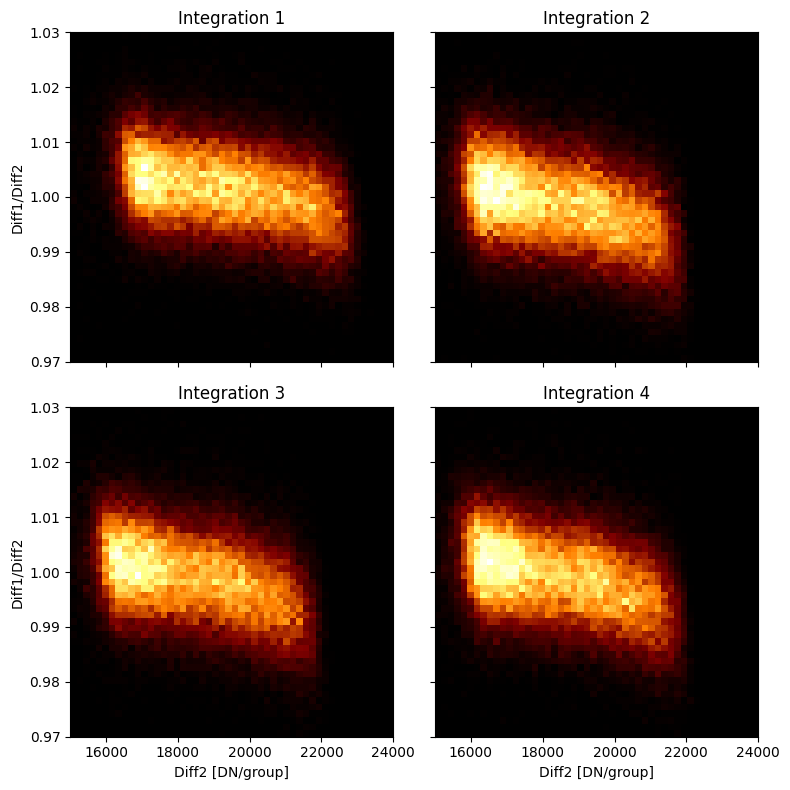

In [18]:
# plot by integration
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.flatten()

for i in range(4):
    # find all the apprpriately flagged pixels
    svals = ((obs.groupdq[i, 2, :, :] & dqflags.group['SATURATED']) == 0) & ((obs.groupdq[i, 3, :, :] & dqflags.group['SATURATED']) > 0)
    diff1 = (obs.data[i, 1, :, :])[svals] - (obs.data[i, 0, :, :])[svals]
    diff2 = (obs.data[i, 2, :, :])[svals] - (obs.data[i, 1, :, :])[svals]
    
    ax[i].hist2d(diff2, diff1/diff2, range=[[15000., 24000.], [0.97, 1.03]], bins=[50, 50], cmap="afmhot")
    
    ax[i].set_title(f"Integration {i+1}")

axes[0, 0].set_ylabel("Diff1/Diff2")
axes[1, 0].set_ylabel("Diff1/Diff2")
axes[1, 1].set_xlabel("Diff2 [DN/group]")
axes[1, 0].set_xlabel("Diff2 [DN/group]")

fig.tight_layout()
plt.savefig("diff1_diff2_by_integration.png")

2024-11-05 09:11:20,847 - stpipe - WARNING - /tmp/ipykernel_6499/1639746748.py:14: RuntimeWarning: divide by zero encountered in divide
  ax[i].hist2d(diff1b, diff1b/diff2b, range=[[500., 23000.], [0.98, 1.07]], bins=[50, 50], cmap="afmhot")



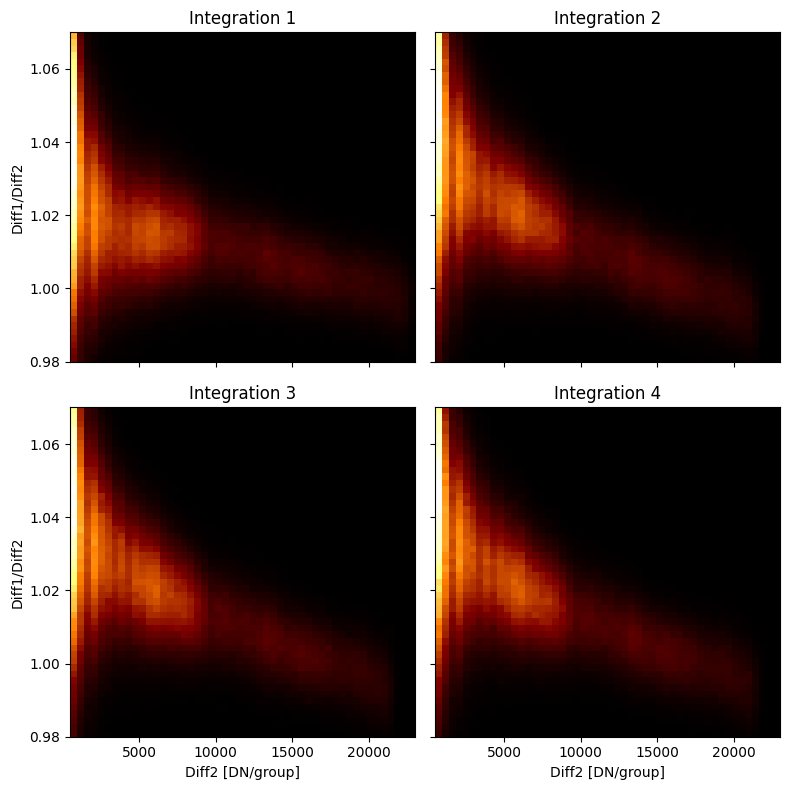

In [19]:
# plot by integration
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.flatten()

for i in range(4):
    # find pixels that are fainter to see what happens for non saturating pixels
    diff1b = obs.data[i, 1, :, :] - obs.data[i, 0, :, :]
    diff2b = obs.data[i, 2, :, :] - obs.data[i, 1, :, :]
    
    newlen = diff1b.shape[0] * diff1b.shape[1]
    diff1b = np.reshape(diff1b, newlen)
    diff2b = np.reshape(diff2b, newlen)
    
    ax[i].hist2d(diff1b, diff1b/diff2b, range=[[500., 23000.], [0.98, 1.07]], bins=[50, 50], cmap="afmhot")
    
    ax[i].set_title(f"Integration {i+1}")

axes[0, 0].set_ylabel("Diff1/Diff2")
axes[1, 0].set_ylabel("Diff1/Diff2")
axes[1, 1].set_xlabel("Diff2 [DN/group]")
axes[1, 0].set_xlabel("Diff2 [DN/group]")

fig.tight_layout()
plt.savefig("diff1_diff2_by_integration_faint.png")